## Grid Search for best hyperparameters of GradientBoosting model
esp. for learning_rate, n_neighbors

In [18]:
import os
import json
import pandas as pd
import gb as gb_lib

datareader = gb_lib.DataReader(data_dir = '../data/',
                               train_valid_file = 'Data_train_validation_2019-1126.xlsx',                                
                               test_file = 'Data_test_2019-1126.xlsx',
                               feature_in = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16','A17'],
                               output_col = 'Type',
                               k_fold = 5)

learning_rate_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n_estimators_list = [50, 100, 150, 200, 250, 300]

best_acc = 0
best_hyper_param = dict()
best_performance = dict()
summary = pd.DataFrame(columns=['learning_rate', 'n_estimators', 'acc_train_avg', 'acc_valid_avg', 'acc_test_avg'])
for learning_rate in learning_rate_list:
    for n_estimators in n_estimators_list:

        ## ensure that output dir exists in local
        output_dir = f'output/{datareader.k_fold}-fold_lr-{learning_rate}_n-{n_estimators}'
        if not os.path.isdir(output_dir):
            os.makedirs(output_dir)       

        ## create gb object
        gb = gb_lib.GB(learning_rate = learning_rate,
                       n_estimators = n_estimators)

        ## config of datareader and gb
        config = gb_lib.configuration(datareader, gb)
        with open(output_dir+'/config.json', 'w') as fout:
            json.dump(config, fout, indent = 4)

        ## run gb with k-fold validation
        print (output_dir)
        acc_train_avg, acc_valid_avg, acc_test_avg = gb_lib.k_fold_validation(datareader, gb, output_dir)            

        ## find the best hyper param of gb model
        if acc_valid_avg > best_acc:
            best_hyper_param['learning_rate'] = learning_rate
            best_hyper_param['n_estimators'] = n_estimators
            best_performance['acc_train_avg'] = acc_train_avg
            best_performance['acc_valid_avg'] = acc_valid_avg
            best_performance['acc_test_avg'] = acc_test_avg
            best_acc = acc_valid_avg

        ## record all output in summary
        summary.loc[len(summary)] = [learning_rate, n_estimators, acc_train_avg, acc_valid_avg, acc_test_avg]

## check best performace with best hyperparam.
print ()
print ('best_hyper_param of gb model:')
print (best_hyper_param)
print ()
print ('best performance of gb model:')
print (f"average accuracy of train set in {datareader.k_fold}-fold: {best_performance['acc_train_avg']}")
print (f"average accuracy of valid set in {datareader.k_fold}-fold: {best_performance['acc_valid_avg']}")
print (f"average accuracy of test set in {datareader.k_fold}-fold: {best_performance['acc_test_avg']}")
print ()

## achieve summary file to dir
print ('overall summary for all models')
print (summary)
summary.to_excel(f'output/Summary_grid-search_{datareader.k_fold}-fold.xlsx')

output/5-fold_lr-0.1_n-50
output/5-fold_lr-0.1_n-100
output/5-fold_lr-0.1_n-150
output/5-fold_lr-0.1_n-200
output/5-fold_lr-0.1_n-250
output/5-fold_lr-0.1_n-300
output/5-fold_lr-0.2_n-50
output/5-fold_lr-0.2_n-100
output/5-fold_lr-0.2_n-150
output/5-fold_lr-0.2_n-200
output/5-fold_lr-0.2_n-250
output/5-fold_lr-0.2_n-300
output/5-fold_lr-0.3_n-50
output/5-fold_lr-0.3_n-100
output/5-fold_lr-0.3_n-150
output/5-fold_lr-0.3_n-200
output/5-fold_lr-0.3_n-250
output/5-fold_lr-0.3_n-300
output/5-fold_lr-0.4_n-50
output/5-fold_lr-0.4_n-100
output/5-fold_lr-0.4_n-150
output/5-fold_lr-0.4_n-200
output/5-fold_lr-0.4_n-250
output/5-fold_lr-0.4_n-300
output/5-fold_lr-0.5_n-50
output/5-fold_lr-0.5_n-100
output/5-fold_lr-0.5_n-150
output/5-fold_lr-0.5_n-200
output/5-fold_lr-0.5_n-250
output/5-fold_lr-0.5_n-300
output/5-fold_lr-0.6_n-50
output/5-fold_lr-0.6_n-100
output/5-fold_lr-0.6_n-150
output/5-fold_lr-0.6_n-200
output/5-fold_lr-0.6_n-250
output/5-fold_lr-0.6_n-300
output/5-fold_lr-0.7_n-50
output/5

## Plot the summary results by contourf func. of matplotlib

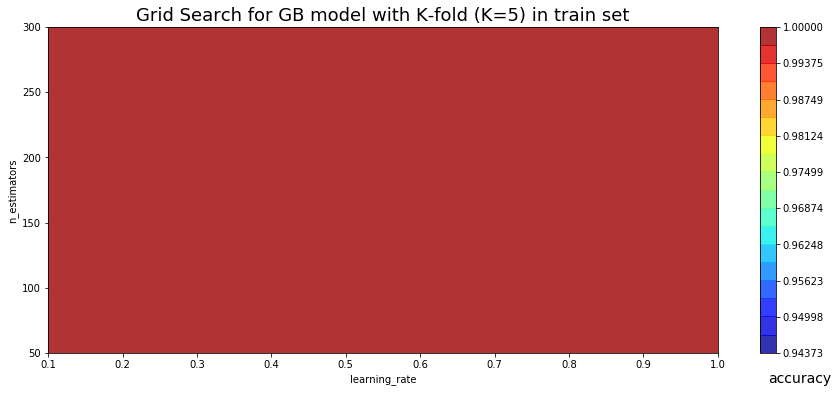

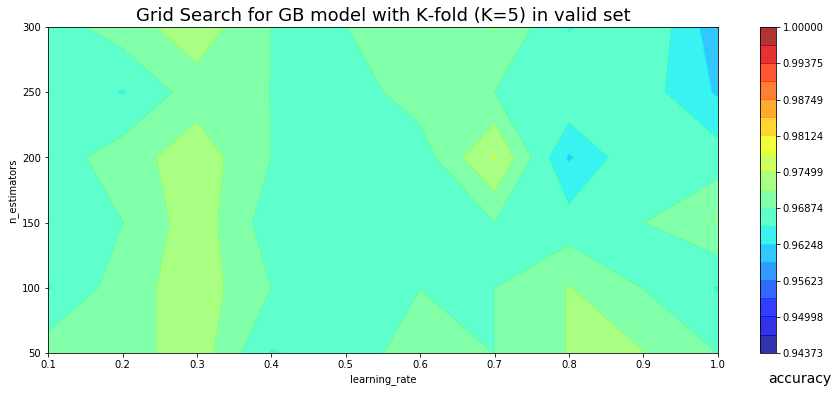

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## custom shared colorbar 
vmin = np.min(summary.iloc[:, -3:].values)
vmax = np.max(summary.iloc[:, -3:].values)
levels = np.linspace(vmin, vmax, 19)

for dataset in ['train', 'valid', 'test']:
    
    acc = summary.loc[:, f'acc_{dataset}_avg'].values    
    acc = acc.reshape(len(learning_rate_list), len(n_estimators_list)).T    
    
    fig, ax1 = plt.subplots(figsize=(15,6))
    C1 = ax1.contourf(learning_rate_list, n_estimators_list, acc, levels=levels, alpha=0.8, cmap='jet')
    ax1.set_xticks(learning_rate_list)
    ax1.set_yticks(n_estimators_list)
    ax1.set_xlabel("learning_rate")
    ax1.set_ylabel("n_estimators")
    ax1.set_title(f"Grid Search for GB model with K-fold (K=5) in {dataset} set", fontsize=18)
    cb1 = fig.colorbar(C1, ax=ax1, orientation='vertical', pad=0.05)
    cb1.set_label("accuracy", labelpad=-40, y=-0.1, rotation=0, fontsize=14)
    cb1.ax.yaxis.set_label_position('left')    
    
    plt.savefig(f'output/grid_search_in_{dataset}_set.png', dpi=300)